In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [24]:
mpl.rcParams['figure.dpi'] = 150

In [21]:
df = pd.read_csv("data/weekdays_hours.csv")

In [23]:
X = pd.get_dummies(df)

In [5]:
pca = PCA(n_components=2).fit(X)
transformed_X = pca.transform(X)

<AxesSubplot:>

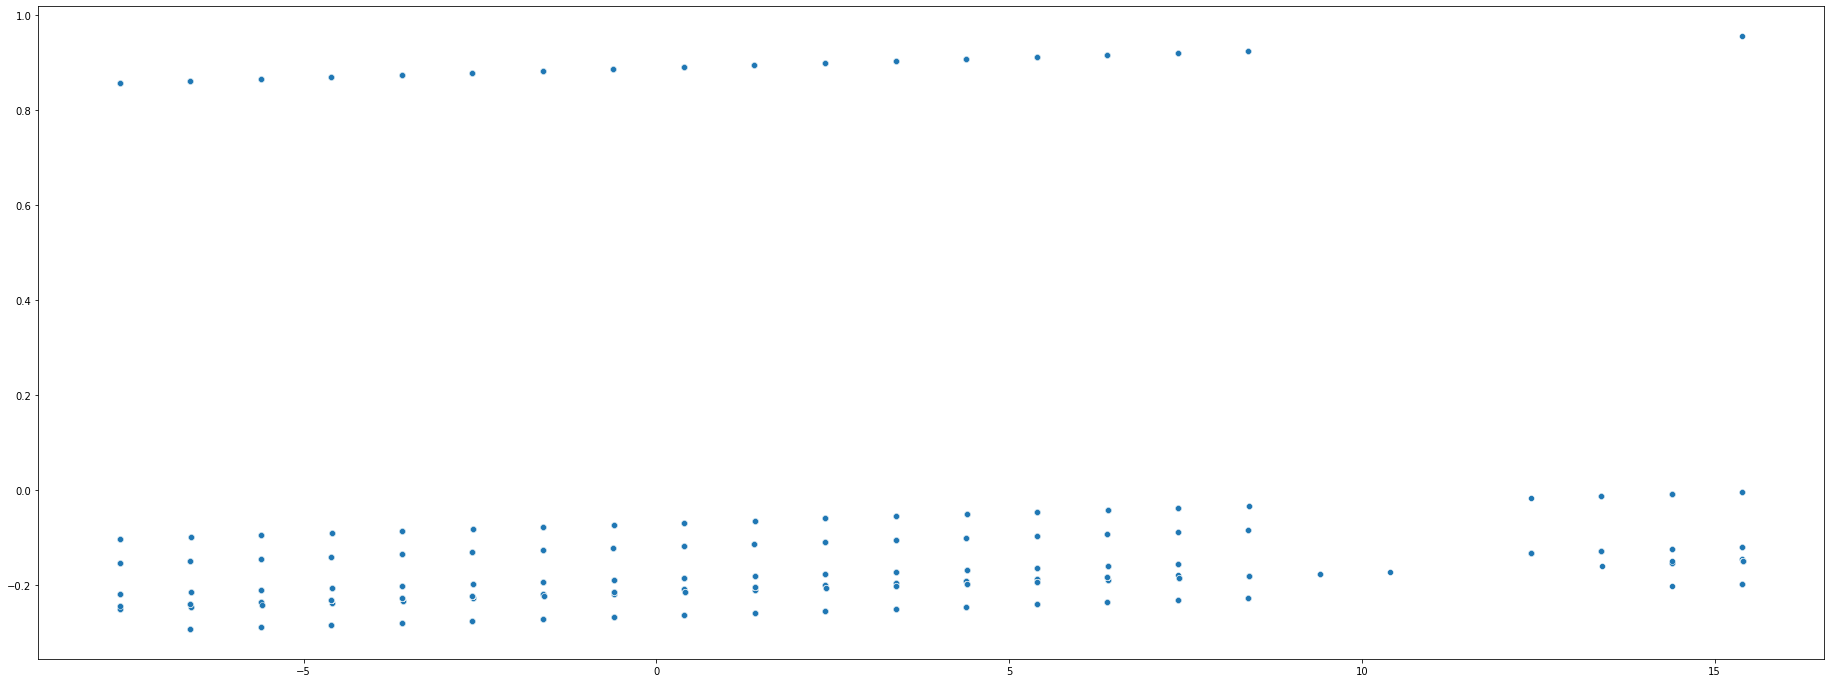

In [25]:
%matplotlib inline
plt.figure(figsize=(32, 12))
sns.scatterplot(x=transformed_X[:, 0], y=transformed_X[:, 1])

In [7]:
pca = PCA(n_components=3).fit(X)
transformed_X = pca.transform(X)

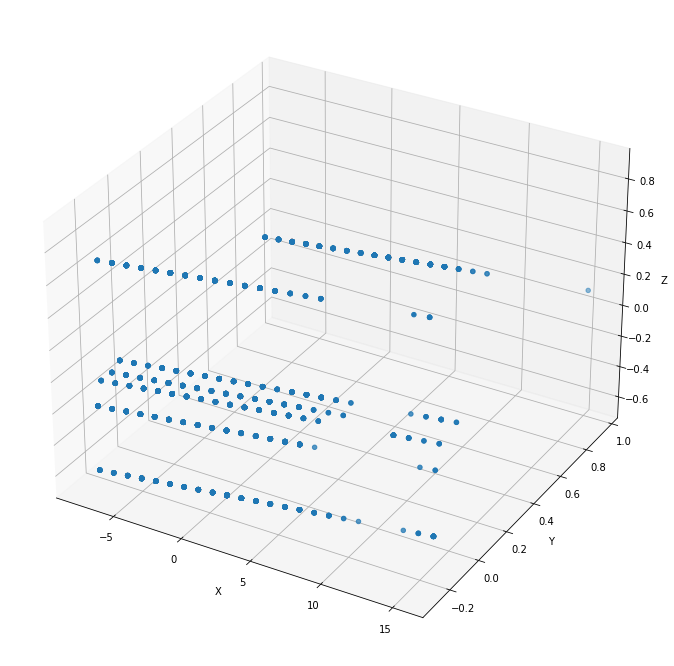

In [8]:
fig = plt.figure(figsize=(32, 12))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.scatter(transformed_X[:, 0], transformed_X[:, 1], transformed_X[:, 2])

plt.show()

In [28]:
clf = IsolationForest(random_state=0, contamination = 0.1).fit(X)
# Don't do this in "real life"!
predictions = clf.predict(X)
predictions_series = pd.Series(predictions)
predictions_series.value_counts()

 1    4051
-1     426
dtype: int64

In [29]:
scores = clf.decision_function(X)

In [35]:
results = pd.DataFrame({"predictions": predictions, "scores": scores})
results.to_csv("data/results.csv", index=False)

<AxesSubplot:ylabel='Count'>

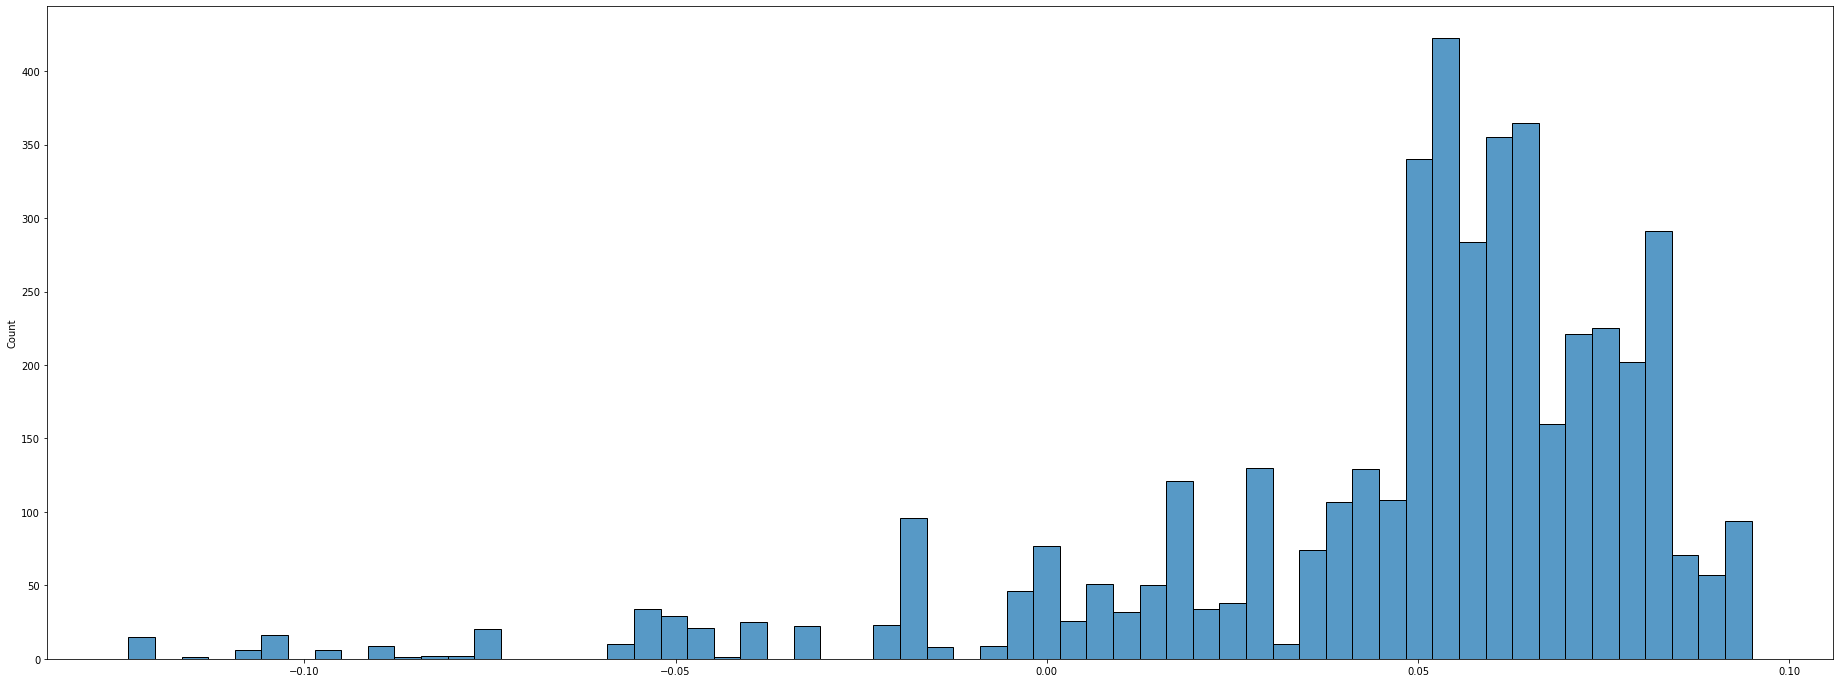

In [30]:
plt.figure(figsize=(32, 12))
#The anomaly score of the input samples. The lower, the more abnormal. Negative scores represent outliers, positive scores represent inliers.
sns.histplot(x=scores)

In [12]:
def predict_input(hour, weekday):
    # https://stackoverflow.com/questions/28465633/easy-way-to-apply-transformation-from-pandas-get-dummies-to-new-data
    df1 = pd.get_dummies(pd.DataFrame({'hour':[hour],'weekday':[weekday]}))
    dummies_frame = pd.get_dummies(X)
    input = df1.reindex(columns = dummies_frame.columns, fill_value=0)
    prediction = clf.predict(input)
    score = clf.decision_function(input)
    print("Prediction: {} (score: {})".format(prediction, score))

In [13]:
predict_input(9, 'Friday')

Prediction: [1] (score: [0.01018511])


In [14]:
predict_input(11, 'Monday')

Prediction: [1] (score: [0.02964442])


In [15]:
predict_input(2, 'Monday')

Prediction: [-1] (score: [-0.09120146])


In [16]:
predict_input(11, 'Wednesday')

Prediction: [1] (score: [0.05751272])


In [17]:
predict_input(1, 'Thursday')

Prediction: [-1] (score: [-0.07626352])


In [18]:
predict_input(17, 'Thursday')

Prediction: [1] (score: [0.06730916])
